* Radical Basis Function
* Regulrization
* Cross Validation
* Confusion Matrix

In [1]:
# Import Required Library
import pandas as pd #pandas is use to load and manipulate data and for one-hot encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt #matplotlib for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # Downsample the data
from sklearn.model_selection import train_test_split # SPlit data into test and training set
from sklearn.preprocessing import scale # scale and centre data 
from sklearn.svm import SVC # This will make support vector machine for classification
from sklearn.model_selection import GridSearchCV #this will do cross validation
from sklearn.metrics import confusion_matrix # this creates confusion matrix
from sklearn.metrics import plot_confusion_matrix #draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA plot on data
from rich_dataframe import prettify
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100000)

In [2]:
# Read data
df = pd.read_excel('default _of_credit_card_clients.xls',
                  header=1)
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Description
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 


- ID The ID number assigned to customer
- LIMIT_BAL Credit limit
- Sex, Gender
- Education, Level of education
- Marriage, Marital status
- Age, Age
- Pay_, When the last six bills were paid
- Bill_AMT, What the last 6 bills were
- PAY_AMT, How much amount was paid
- default payment next month- This is what we are going to predict
We are changing default payment next month to default

In [3]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Also, the values in the ID column were randomly assigned, making it uniformative, so we can drop it

In [4]:
df.drop('ID', axis=1, inplace=True) # Set axis=0 to remove rows, axis=1 to remove columns
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Removing Missing data
Two ways to deal
- Remove rows haivng missing data
- Impute missing data

In [5]:
# Check data types in each column
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [6]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [7]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

We see education contains value other then specified in data dictionary

In [8]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

0 is unexpected value, we will treat as missing data in one approach, and one without 

In [9]:
len(df.loc[(df['EDUCATION']==0) | (df['MARRIAGE'] == 0)])

68

In [10]:
len(df)

30000

In [11]:
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing_data)

29932

In [12]:
df_no_missing_data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [13]:
df_no_missing_data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

## Downsample Data
SVM are great with small datasets, but not awesome with large data sets, while this dataset not huge, is big enough to take long time to optimize with cross validation. So we'll downsample both categories, customers who did and didn't default to 1000 each.

In [14]:
df_no_default = df_no_missing_data.loc[df_no_missing_data['DEFAULT'] == 0]
df_default = df_no_missing_data.loc[df_no_missing_data['DEFAULT'] == 1]

now downsample the dataset that did not default...

In [15]:
df_no_default_downsampled = resample(df_no_default,
                                    replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

In [16]:
df_default_downsample = resample(df_default,
                                replace=False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_default_downsampled)

1000

In [17]:
df_downsample = pd.concat([df_default_downsample, df_no_default_downsampled])
len(df_downsample)

2000

### Format data part 1: Split data into two parts
1. The columns of data that we will use to make classification X
2. COlumns we want to predict y

In [18]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000,2,1,1,47,3,2,2,2,2,2,5000,5000,5000,5000,5000,5000,0,0,0,0,0,0
19350,80000,2,2,2,36,2,0,0,-2,-2,-2,19671,20650,0,0,0,0,1700,0,0,0,0,0
17057,30000,2,3,2,22,2,2,0,0,0,0,29793,29008,29047,29507,11609,11711,0,1687,1147,524,400,666
26996,80000,1,1,2,34,2,2,2,2,2,2,61231,62423,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,-2,11771,13462,17706,0,5646,14793,13462,17706,0,5646,14793,7376


In [19]:
y = df_downsample['DEFAULT'].copy()
y.head()

19982    1
19350    1
17057    1
26996    1
23621    1
Name: DEFAULT, dtype: int64

## One-Hot Encoding
Make data columns into categories for identified categorical data
ColumnTransformer() and pandas get_dummies()

In [20]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
19982,300000,2,1,47,3,2,2,2,2,2,5000,5000,5000,5000,5000,5000,0,0,0,0,0,0,1,0,0
19350,80000,2,2,36,2,0,0,-2,-2,-2,19671,20650,0,0,0,0,1700,0,0,0,0,0,0,1,0
17057,30000,2,3,22,2,2,0,0,0,0,29793,29008,29047,29507,11609,11711,0,1687,1147,524,400,666,0,1,0
26996,80000,1,1,34,2,2,2,2,2,2,61231,62423,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600,0,1,0
23621,210000,2,3,44,-2,-2,-2,-2,-2,-2,11771,13462,17706,0,5646,14793,13462,17706,0,5646,14793,7376,1,0,0


In [21]:
X_encoded = pd.get_dummies(X, columns=['SEX', 
                                       'EDUCATION', 
                                       'MARRIAGE', 
                                       'PAY_0', 
                                       'PAY_2',
                                       'PAY_3', 
                                       'PAY_4', 
                                       'PAY_5', 
                                       'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19350,80000,36,19671,20650,0,0,0,0,1700,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,1147,524,400,666,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,0,5646,14793,7376,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Center and scale data.
The **Radial Basis Function**(RBF) that we are using with our support vector machine assumes that the data are centered and scaled. In other words, each column should have a mean of 0 and standard deviation of 1. So we need to do this for both training and testing datasets.

NOTE: We split data into training and testing datasets and then scale then separately to avoid Date leakage, Data leakage occurs when information about the training set corrupts or influences the testing dataset.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Build a Preliminary Support Vector Machine

In [23]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

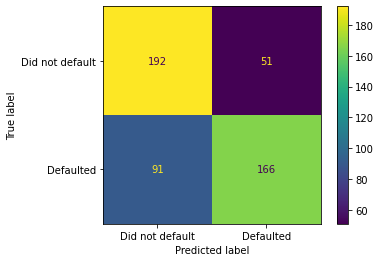

In [24]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=['Did not default', 'Defaulted'])

In [25]:
len(df_downsample.columns)

24

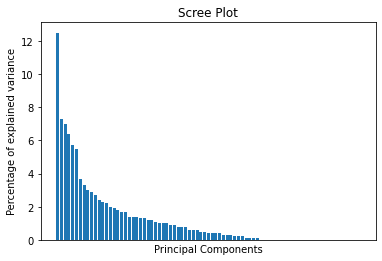

In [26]:
pca = PCA() #Note: By default , PCA() centers the data, but does not scale it
X_train_pca = pca.fit_transform(X_test_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
lables = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
                axis='x',  # Changes apply to x-axis
                which = 'both', #both major and minor ticks are affected
                bottom = False, #ticks along the bottom edge are off
                top = False, #ticks along the top edge are off
                labelbottom = False) #labels along the bottom edge are off
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [27]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

## Note 
## pc1 contains the x-axis coordinated of the data after PCA
## pc2 contains the y-axis coordinated of the data after PCA

#Now scale and center the PCs..
pca_trained_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to x and y-axis cooordinates
## of the data after PCA demiension reduction..
param_grid = [
    {'C': [1, 10, 100, 1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
SVC(),
param_grid,
cv=5,
scoring='accuracy', #note: The default value for scoring results in worse performance...
## For more scoring etics see scikit learn library documentation
verbose=0 #Note IF you want to see what grid search is doing set verbose to 2
)

optimal_params.fit(pca_trained_scaled, y_train)
print(optimal_params.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [500, 1500]